In [11]:
import pandas as pd
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('diabetes').getOrCreate()
df = spark.read.csv('Datasets/04DataTransformation.csv', inferSchema=True, header=True)

df = df.toPandas()
display(df)

,ID,Diabetes_binary,HighBP,HighChol,BMI,BMIBand,Smoker,Stroke,...,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Sex,Age,Education,Income
0,131805,0,1,0,42,6,0,1,...,0,1,0,0,0,12,2,2
1,229519,0,0,0,23,2,0,0,...,1,1,1,0,0,9,5,7
2,125271,0,0,1,25,3,1,0,...,1,0,0,0,1,12,5,7
3,183133,0,0,0,24,2,1,0,...,1,1,1,0,1,12,6,5
4,198610,0,1,1,27,3,0,0,...,1,0,1,0,1,5,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79947,110366,1,0,0,18,1,1,0,...,1,1,1,0,0,13,5,5
79948,138511,1,1,1,33,4,0,0,...,1,1,0,0,0,11,4,3
79949,36771,1,1,1,34,4,0,0,...,0,1,1,0,0,9,3,3
79950,172306,1,1,0,33,4,0,0,...,1,0,1,0,0,9,5,7


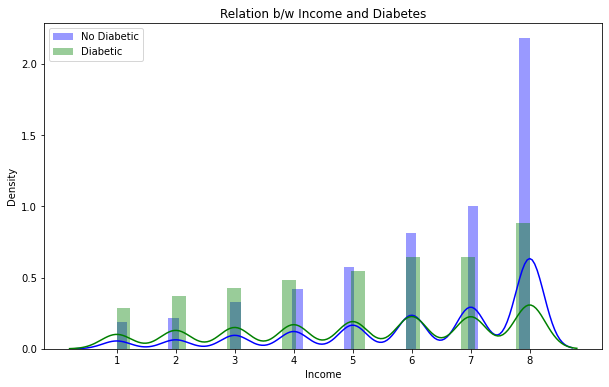

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

plt.figure(figsize=(10,6))
warnings.filterwarnings('ignore')

sns.distplot(df.Income[df.Diabetes_binary == 0], color="b", label="No Diabetic" )
sns.distplot(df.Income[df.Diabetes_binary == 1], color="g", label="Diabetic" )
plt.title("Relation b/w Income and Diabetes")
plt.xticks(df["Income"].unique())

plt.legend()

In [13]:
from sklearn.ensemble import RandomForestClassifier

from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split

x= df.drop(['ID', 'Diabetes_binary'], axis=1)
y= df.Diabetes_binary

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

test_scores = []
train_scores = []

for i in tqdm (range(1,15)):
#for i in range(1,15):

    rf =  RandomForestClassifier(i)
    rf.fit(x_train,y_train)
    
    train_scores.append(rf.score(x_train,y_train))
    test_scores.append(rf.score(x_test,y_test))

  0%|          | 0/14 [00:00<?, ?it/s]

In [14]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 95.32214943481185 % and k = [14]


In [15]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 68.53855293602652 % and k = [11]


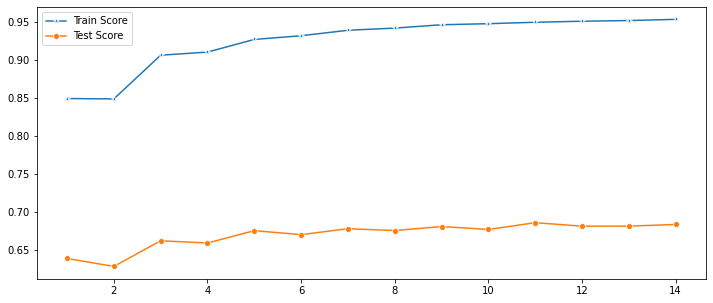

In [16]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 16)

from sklearn import tree
x= df.drop(['Diabetes_binary'], axis=1)
y= df.Diabetes_binary
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
cartModel = tree.DecisionTreeClassifier()
cartModel = cartModel.fit(x_train, y_train)
y_pred = cartModel.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     42798
           1       0.31      0.34      0.32      7938

    accuracy                           0.78     50736
   macro avg       0.59      0.60      0.60     50736
weighted avg       0.79      0.78      0.78     50736



In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 16)
from sklearn.ensemble import RandomForestClassifier

randForestModel = RandomForestClassifier(n_estimators=10, random_state = 0)
randForestModel = randForestModel.fit(x_train, y_train)
y_pred = randForestModel.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     42798
           1       0.45      0.19      0.27      7938

    accuracy                           0.84     50736
   macro avg       0.66      0.57      0.59     50736
weighted avg       0.80      0.84      0.81     50736



In [22]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_columns', 16)

logisticalRegressionModel = LogisticRegression(random_state=0,solver='lbfgs', max_iter=3000)
logisticalRegressionModel = logisticalRegressionModel.fit(x_train, y_train)
y_pred = logisticalRegressionModel.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.92     42798
           1       0.54      0.18      0.27      7938

    accuracy                           0.85     50736
   macro avg       0.70      0.58      0.59     50736
weighted avg       0.81      0.85      0.81     50736

